Hierarichal Clustering Implementation


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
## Import IRIS dataset
iris = datasets.load_iris()

iris_data = pd.DataFrame(iris.data)

iris_data.columns = iris.feature_names

iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# Standardization 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x_scaled= scaler.fit_transform(iris_data)

x_scaled
x_scaled.shape

(150, 4)

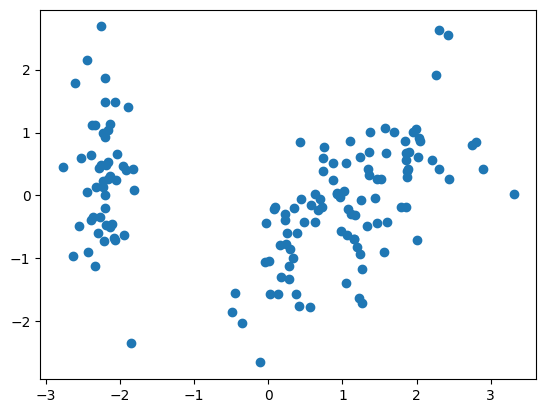

In [7]:
# Apply the PCA
from sklearn.decomposition import PCA

pca= PCA(n_components=2)

pca_scaled= pca.fit_transform(x_scaled)

plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

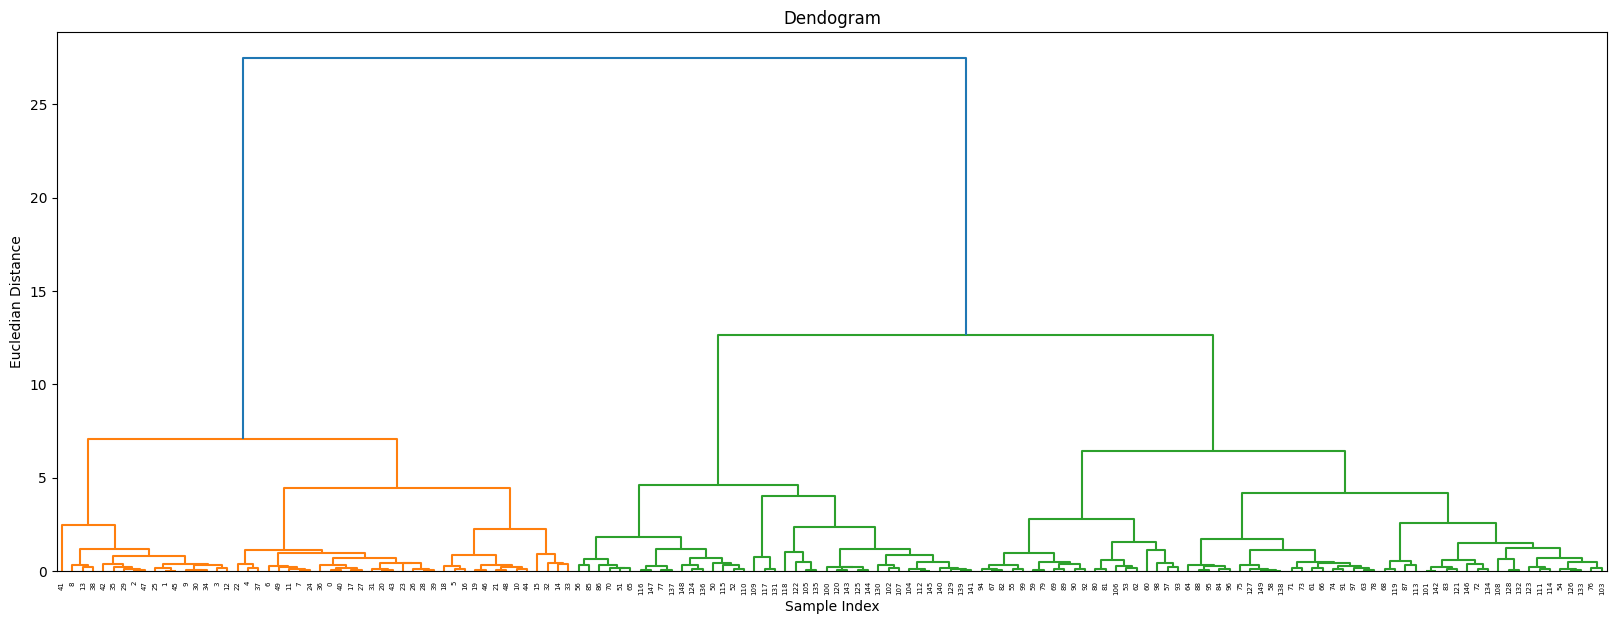

In [8]:
## Agglomerative Clustering
## To Construct a dendogram

import scipy.cluster.hierarchy as sc

## plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendrograms")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean'
,linkage='ward')
cluster.fit(pca_scaled)

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [11]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

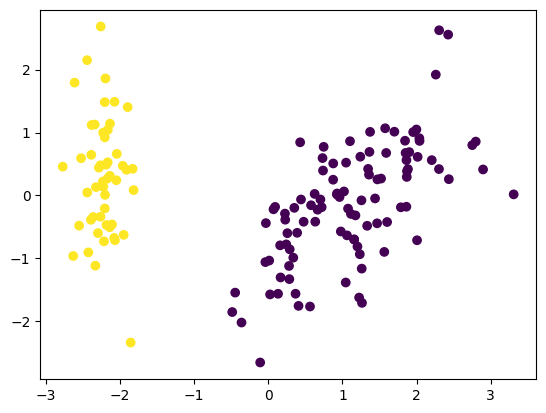

In [12]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglo.fit(x_scaled)

    score = silhouette_score(x_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

print(silhouette_coefficients)


[0.5770346019475988, 0.4466890410285909, 0.4006363159855973, 0.33058726295230545, 0.31485480100512825, 0.316969830299128, 0.310946529007258, 0.31143422475471655, 0.3161120375980681]


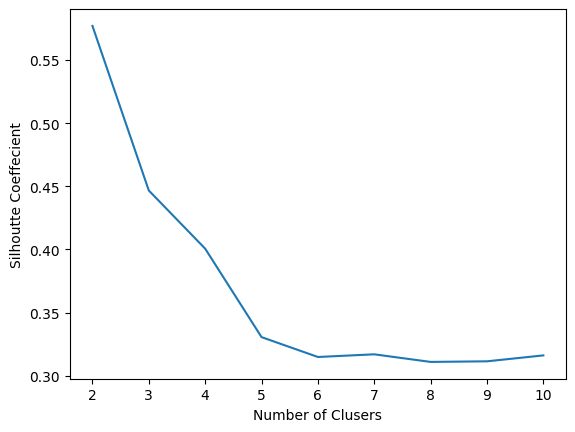

In [17]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusers")
plt.ylabel("Silhoutte Coeffecient")
plt.show()